### 1. Introduction

**Context and Objective :**

Passenger satisfaction is a vital element for the success and reputation of any airline company. Recently, survey results from Maven Airlines passengers have revealed a satisfaction rate below 50% for the first time. The objective of this analysis is to identify key areas in need of improvement and to recommend a data-driven strategy to increase the satisfaction rate.

**Dataset Import and Analytical Tools :**

For this analysis, we will use Python's Pandas library to import the dataset and perform the necessary manipulations. Libraries such as Numpy, Seaborn, and Matplotlib will be employed to transform the data and create relevant visualizations. Additionally, Scikit-Learn will be used to apply Machine Learning techniques for uncovering complex trends and relationships within the data. Finally, Plotly will be implemented to create an interactive dashboard, allowing for a detailed and intuitive visual exploration of the data.

**Dataset Description :**

The dataset includes a significant number of observations and variables related to the passenger satisfaction of Maven Airlines. It covers various aspects of the flight experience, such as seat comfort, meal quality, flight punctuality, ancillary services, and many more. The information contained in this dataset will enable us to understand the specific factors that influence passenger satisfaction and to develop concrete recommendations for improving customer experience.

### 2. Data and Library Import

In [1]:
# Loading the various libraries necessary for our study

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc
from dash import html



pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [2]:
# Dataset Import

df = pd.read_csv("/Users/arvind.b/Downloads/Airline+Passenger+Satisfaction (1)/airline_passenger_satisfaction.csv")

# Visualizing the First Rows of Our Dataset

df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.describe(include = "all")

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880.000000,129880,129880.000000,129880,129880,129880,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880
unique,NaN,2,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,NaN,Returning,Business,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral or Dissatisfied
freq,NaN,65899,NaN,106100,89693,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,64940.500000,NaN,39.427957,NaN,NaN,NaN,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,NaN
std,37493.270818,NaN,15.119360,NaN,NaN,NaN,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,NaN
min,1.000000,NaN,7.000000,NaN,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,32470.750000,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,NaN
50%,64940.500000,NaN,40.000000,NaN,NaN,NaN,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,NaN
75%,97410.250000,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,NaN


### 3. Data Cleaning and Preparation

In this section, we will perform a preliminary study of the data, focusing on the following aspects :

**Identification and Handling of Missing Values** : We will examine the data to identify missing values and determine the best method for handling them, whether through deletion or imputation.

**Checking for Duplicate Values** : An analysis will be conducted to detect any potential duplications in the dataset. Duplicates will be assessed and treated as relevant for the analysis.

**Verification of Each Variable's Type** : We will verify the type of each variable in our dataset to ensure that each attribute is of the appropriate type. A conversion of types will be performed if necessary.

In [4]:
# Identification of Missing Values

missing_values = df.isnull().sum()
print("Missing Values by Variable :")
print(missing_values)



Missing Values by Variable :
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-fl

In [5]:
# Handling Missing Values

for column in df.columns:

    # If the column is of numerical type, fill missing values with the median

    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].median(), inplace=True)

    # If the column is of categorical (object) type, fill missing values with the most frequent value
    
    elif df[column].dtype == 'object':
        mode_column = df[column].mode().iloc[0]
        df[column].fillna(mode_column, inplace=True)


print("Number of Remaining Missing Values :", df.isnull().sum())



Number of Remaining Missing Values : ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                

In [6]:
# Identifying Duplicates

duplicates = df.duplicated()
print("Number of Duplicates Found :", duplicates.sum())

# Handling of Duplicates, in our case we have chosen to delete them

data = df.drop_duplicates()
print("Duplicates Removed.")


Number of Duplicates Found : 0
Duplicates Removed.


In [7]:
# Display the types of each variable

variable_types = df.dtypes
print("Variable Types:")
print(variable_types)


Variable Types:
ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                 

In [8]:
# Conversion of variable types

df['ID'] = df['ID'].astype(object)
df['Arrival Delay'] = df['Arrival Delay'].astype(int)
print(df.dtypes)

ID                                        object
Gender                                    object
Age                                        int64
Customer Type                             object
Type of Travel                            object
Class                                     object
Flight Distance                            int64
Departure Delay                            int64
Arrival Delay                              int64
Departure and Arrival Time Convenience     int64
Ease of Online Booking                     int64
Check-in Service                           int64
Online Boarding                            int64
Gate Location                              int64
On-board Service                           int64
Seat Comfort                               int64
Leg Room Service                           int64
Cleanliness                                int64
Food and Drink                             int64
In-flight Service                          int64
In-flight Wifi Servi

Now that we have completed all the necessary treatments for cleaning our data, we can begin the exploratory analysis. For this, we will start with univariate, bivariate, and multivariate analysis. We will then proceed with a Machine Learning model and see if we can predict our customers' satisfaction rating.

### 4. Univariate Analysis

What is the overall distribution of passenger satisfaction in the dataset ?

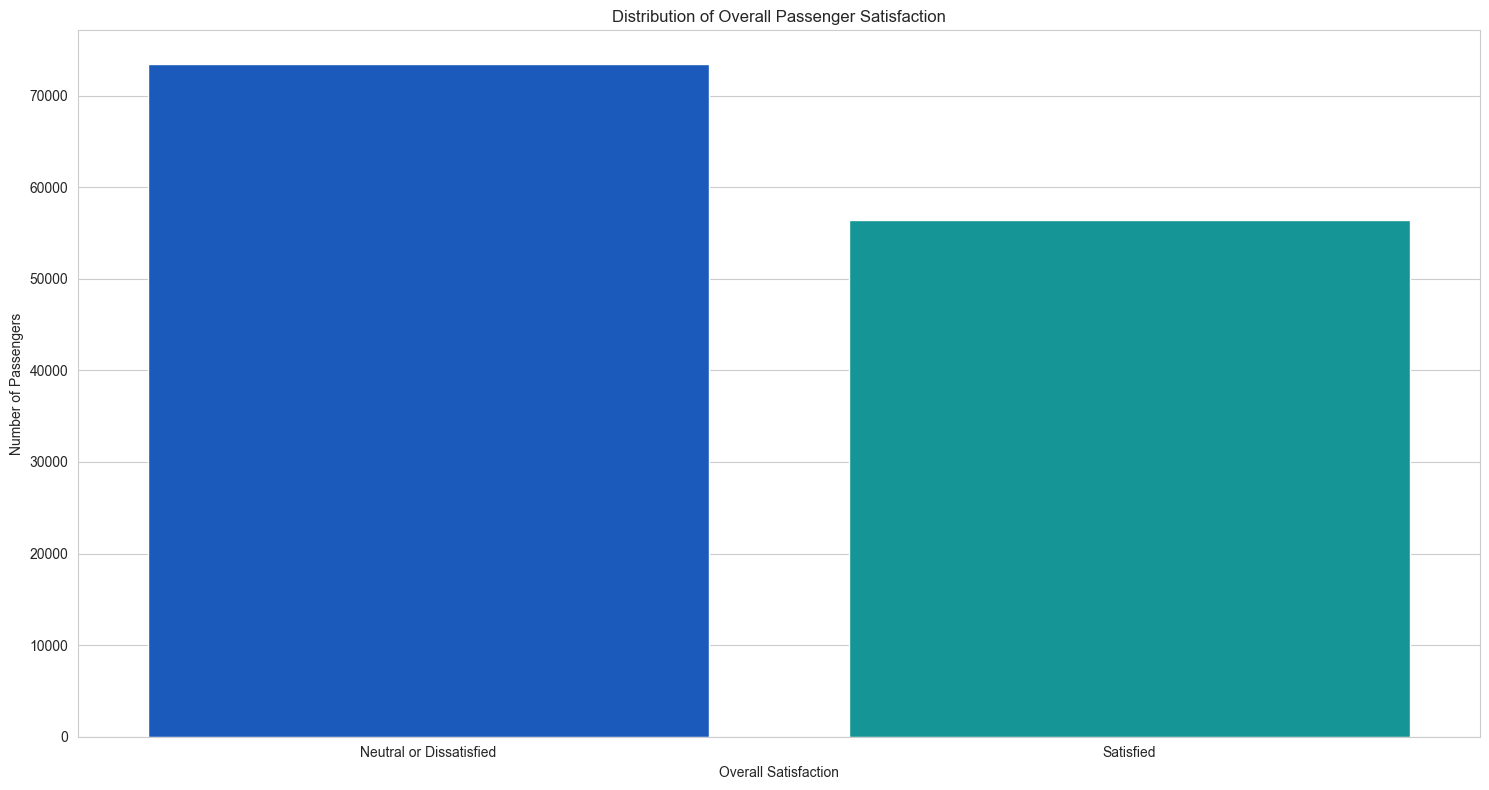

In [9]:
# Plot the distribution of overall passenger satisfaction

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Satisfaction', data = df, palette = 'winter')
plt.title('Distribution of Overall Passenger Satisfaction')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()


Observation : The graph shows the distribution of overall passenger satisfaction. We can observe that the number of passengers who are neutral or dissatisfied is significantly higher than the number of satisfied passengers.

What is the distribution of passengers age in the dataset ?

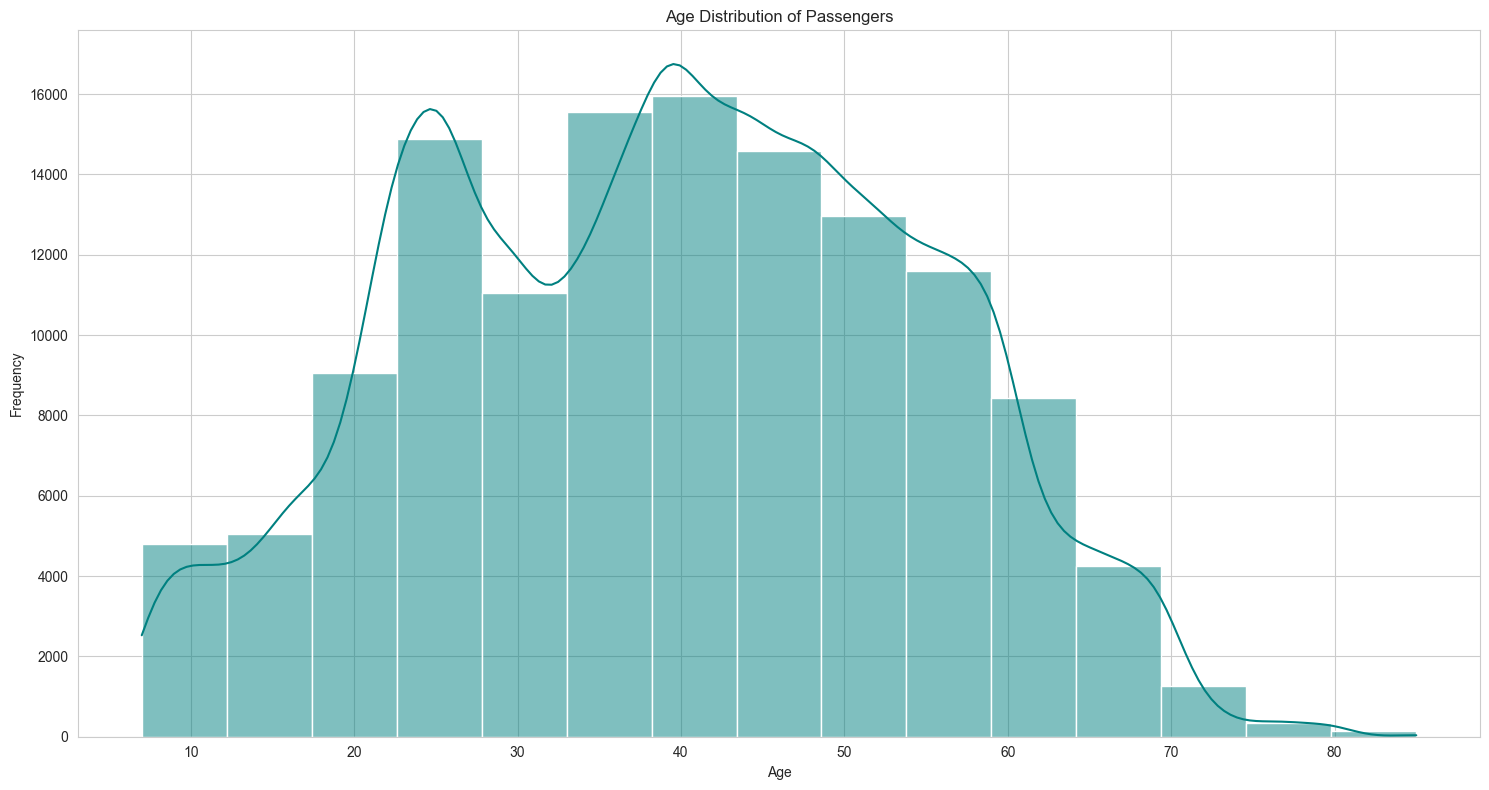

In [10]:
# Plot the age distribution of passengers

plt.figure(figsize = (15, 8))
sns.histplot(df['Age'], bins = 15, kde = True, color = 'teal')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Observation : The histogram shows the age distribution of passengers. We can observe a relatively uniform distribution with some notable peaks, particularly in the age groups of 20 to 30 years and 35 to 45 years.

What is the distribution of the type of travel (business or personal) among passengers ?

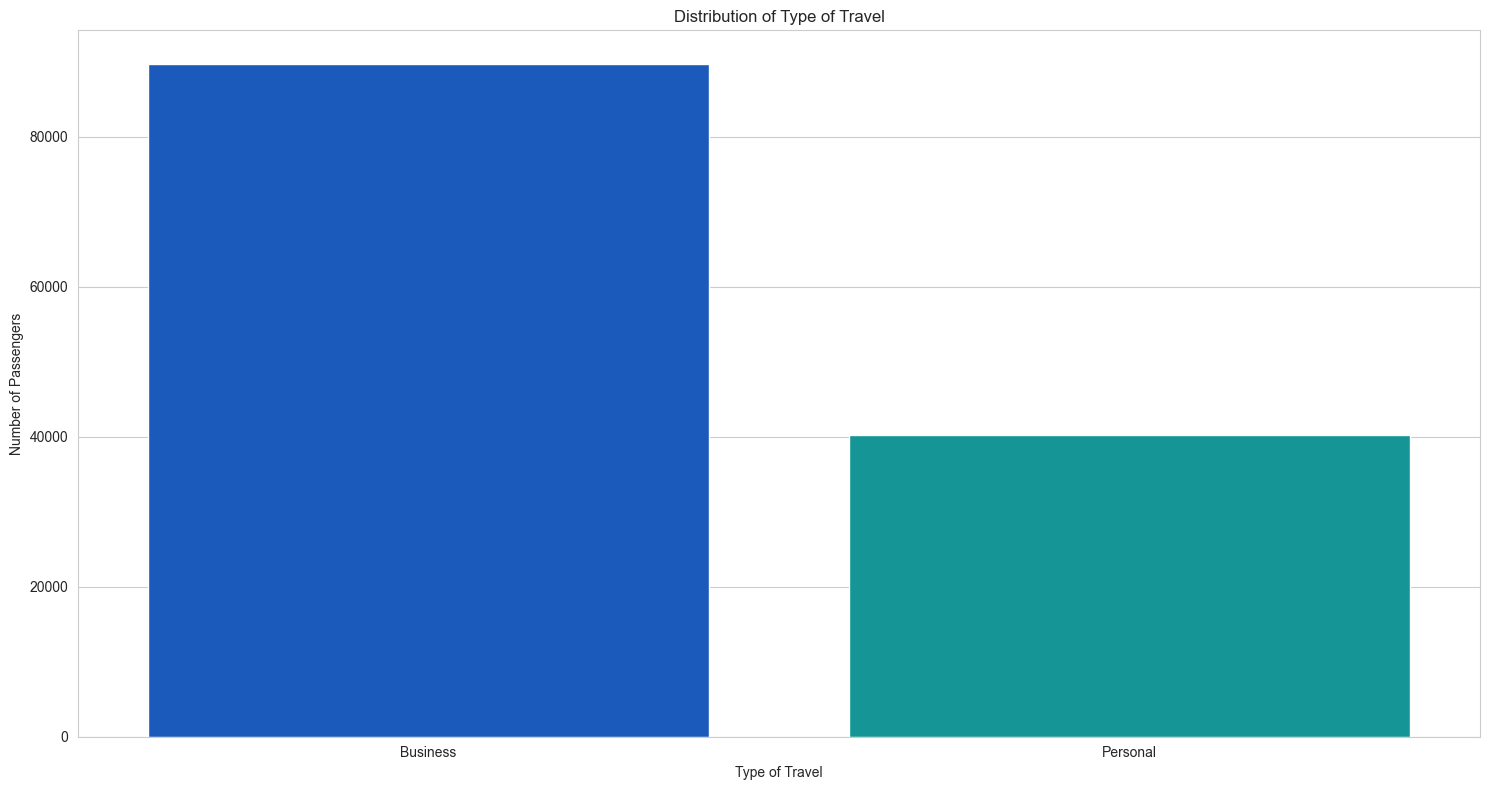

In [11]:
# Plot the distribution of the type of travel (Business/Personal)

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Type of Travel', data = df, palette = 'winter')
plt.title('Distribution of Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()


Observation : The bar chart clearly shows that the majority of passengers in this dataset are traveling for business reasons, while a smaller proportion travels for personal reasons.

What is the distribution of travel class among passengers ?

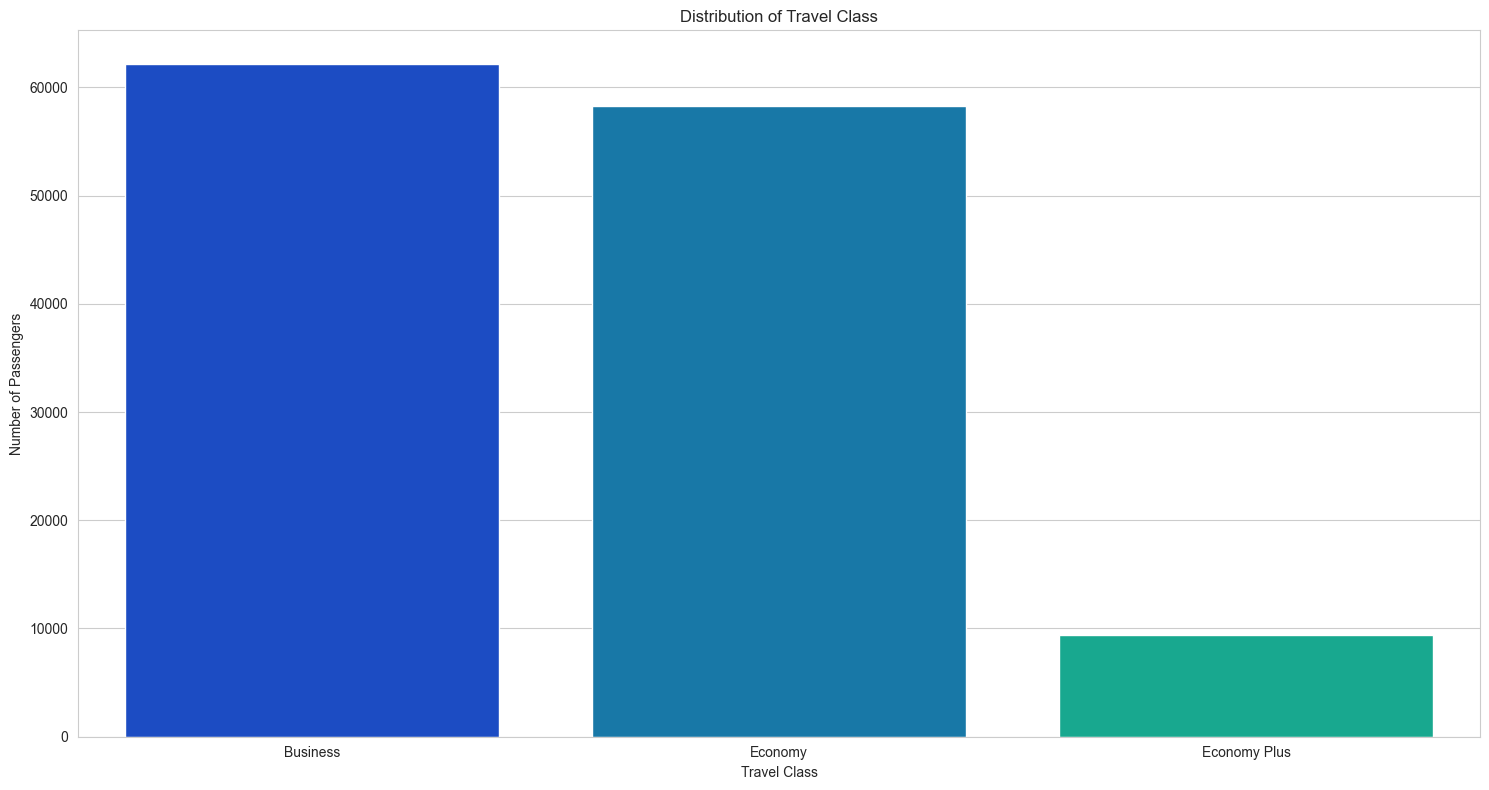

In [12]:
# plot the distribution of passengers' travel class

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Class', data = df, palette = 'winter')
plt.title('Distribution of Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

Observation : The bar chart shows the distribution of travel class among passengers. The majority of passengers travel in Business class, followed by Economy class (Eco), and finally, Economy Plus class (Eco Plus).

What is the distribution of satisfaction with onboard Wi-Fi service among passengers ?

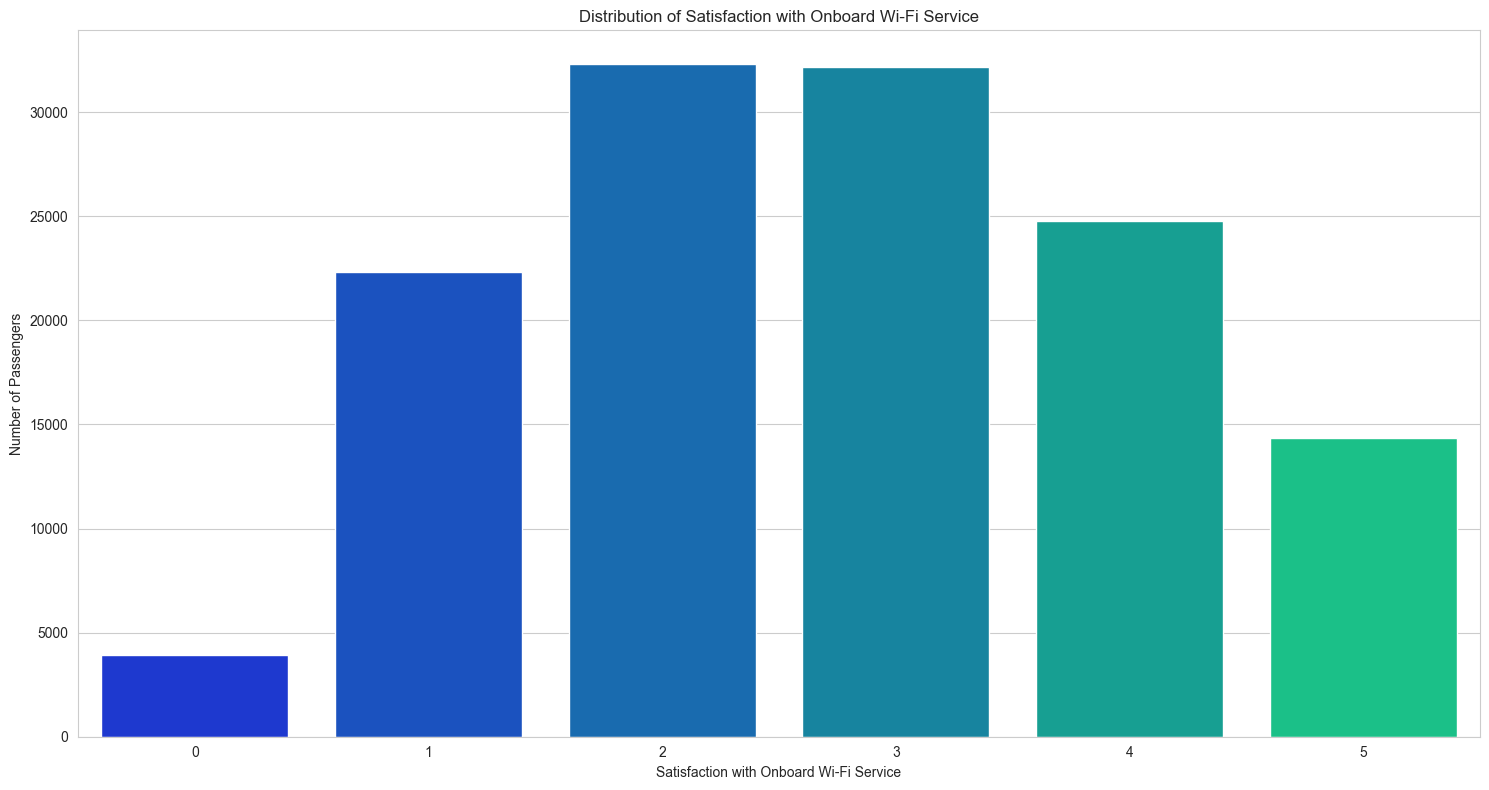

In [13]:
# Plot the distribution of ratings for the Wifi service by passengers

plt.figure(figsize = (15, 8))
sns.countplot(x = 'In-flight Wifi Service', data = df, palette = 'winter')
plt.title('Distribution of Satisfaction with Onboard Wi-Fi Service')
plt.xlabel('Satisfaction with Onboard Wi-Fi Service')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

Observation : The bar chart shows the distribution of satisfaction with the onboard Wi-Fi service, rated on a scale of 1 to 5. There appears to be a varied distribution with a notable peak for the ratings 2 and 3, indicating relative dissatisfaction.

### 5. Bivariate Analysis

How does overall passenger satisfaction vary according to the travel class ?

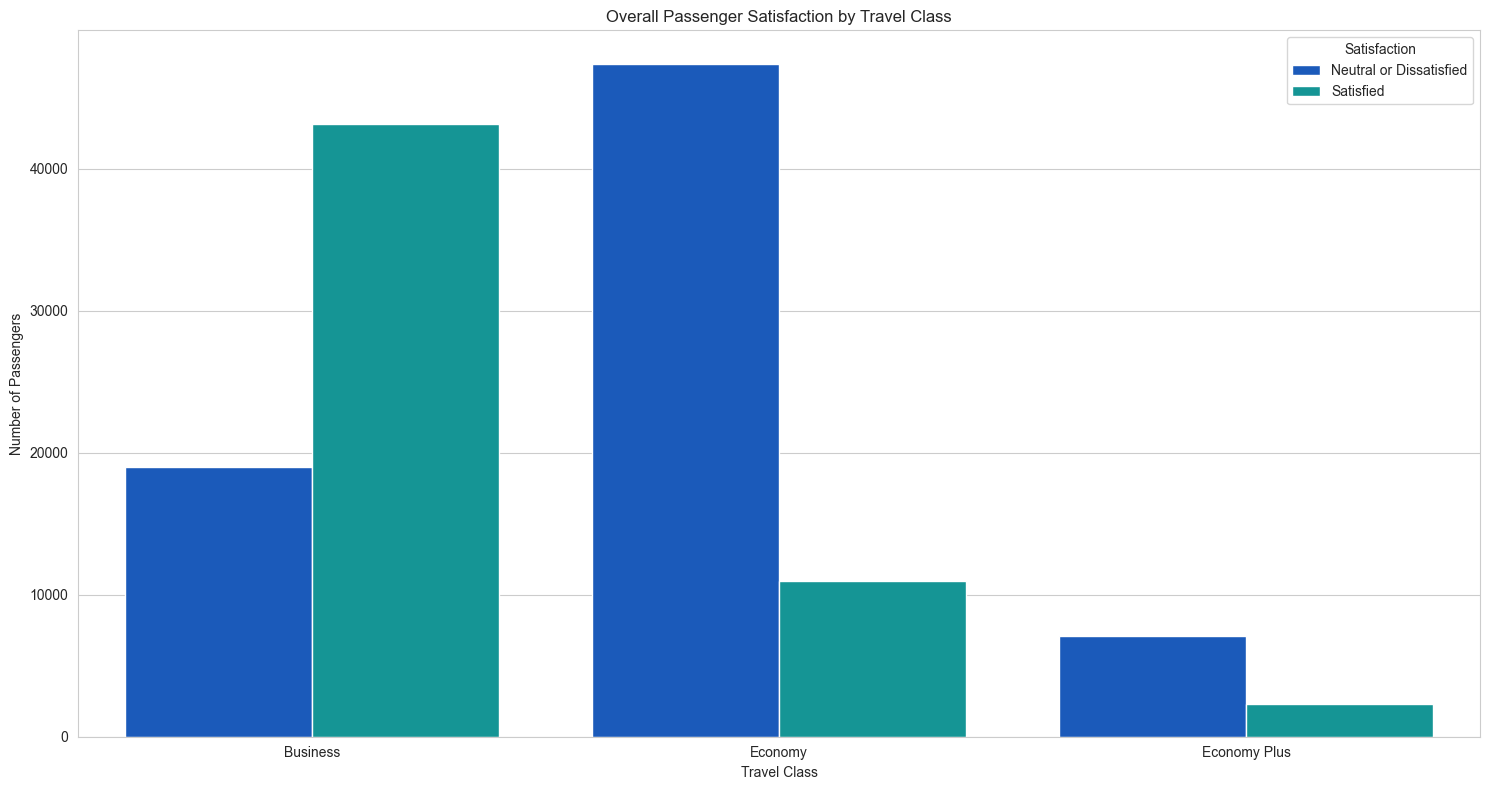

In [14]:
# Plot the relationship between overall satisfaction and travel class

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Class', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Overall Passenger Satisfaction by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Number of Passengers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : The bar chart shows the distribution of overall passenger satisfaction by travel class. We can observe that :

In Business class, the majority of passengers are satisfied.
In Economy (Eco) and Economy Plus (Eco Plus) classes, the majority of passengers are dissatisfied.

How does overall passenger satisfaction vary according to age ?

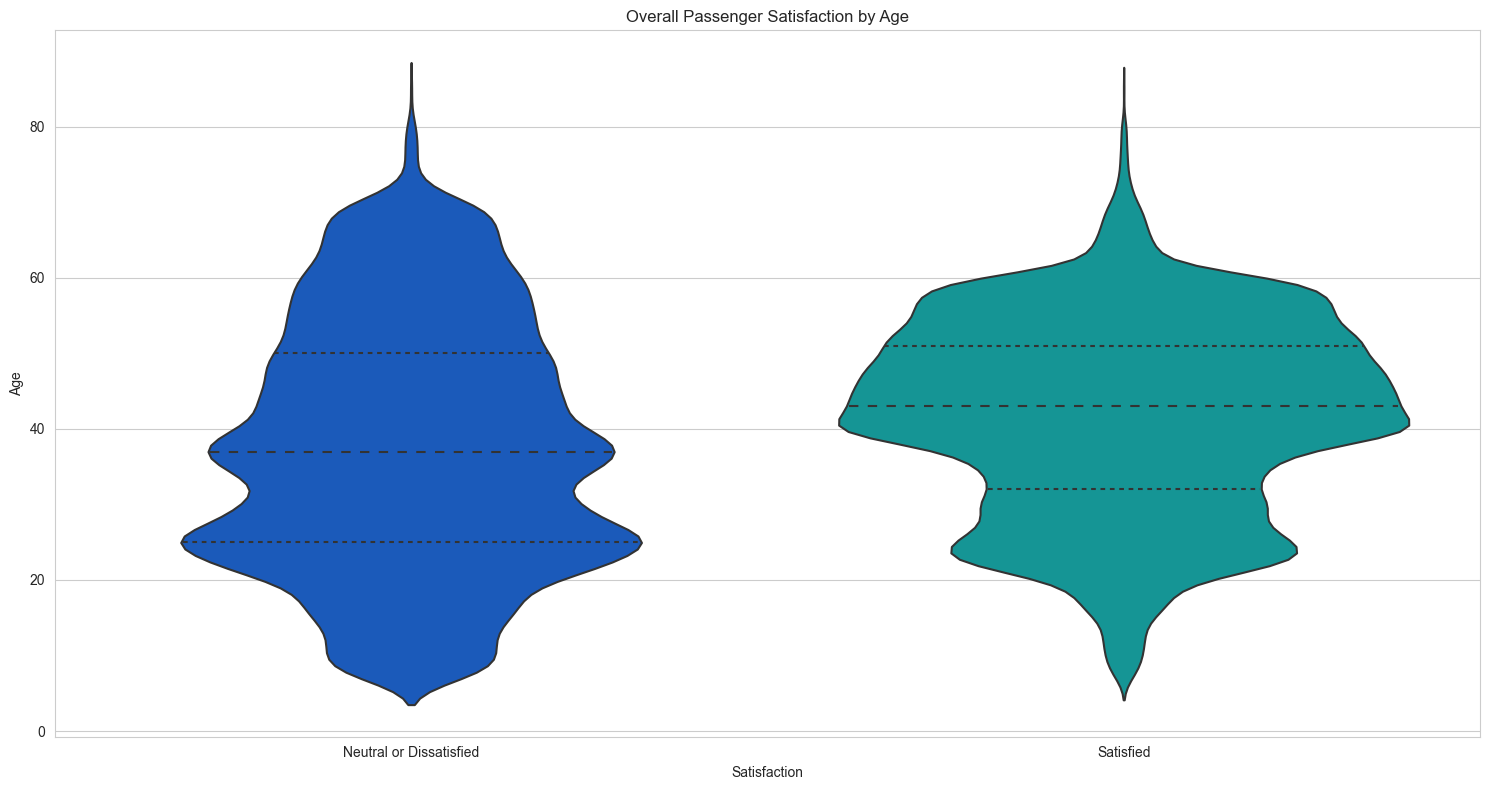

In [15]:
# Plot the relationship between overall satisfaction and passengers' age

plt.figure(figsize = (15, 8))
sns.violinplot(x = 'Satisfaction', y = 'Age', data = df, palette = 'winter', inner = 'quartile')
plt.title('Overall Passenger Satisfaction by Age')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Observation : The violin plot shows the age distribution of passengers based on their overall satisfaction. We can observe that :

Satisfied passengers have a narrower age distribution, with a concentration around the forties.
Dissatisfied or neutral passengers have a wider age distribution, but with a slightly younger concentration, around the twenties.

How does passenger satisfaction vary with in-flight Wi-Fi service satisfaction ?

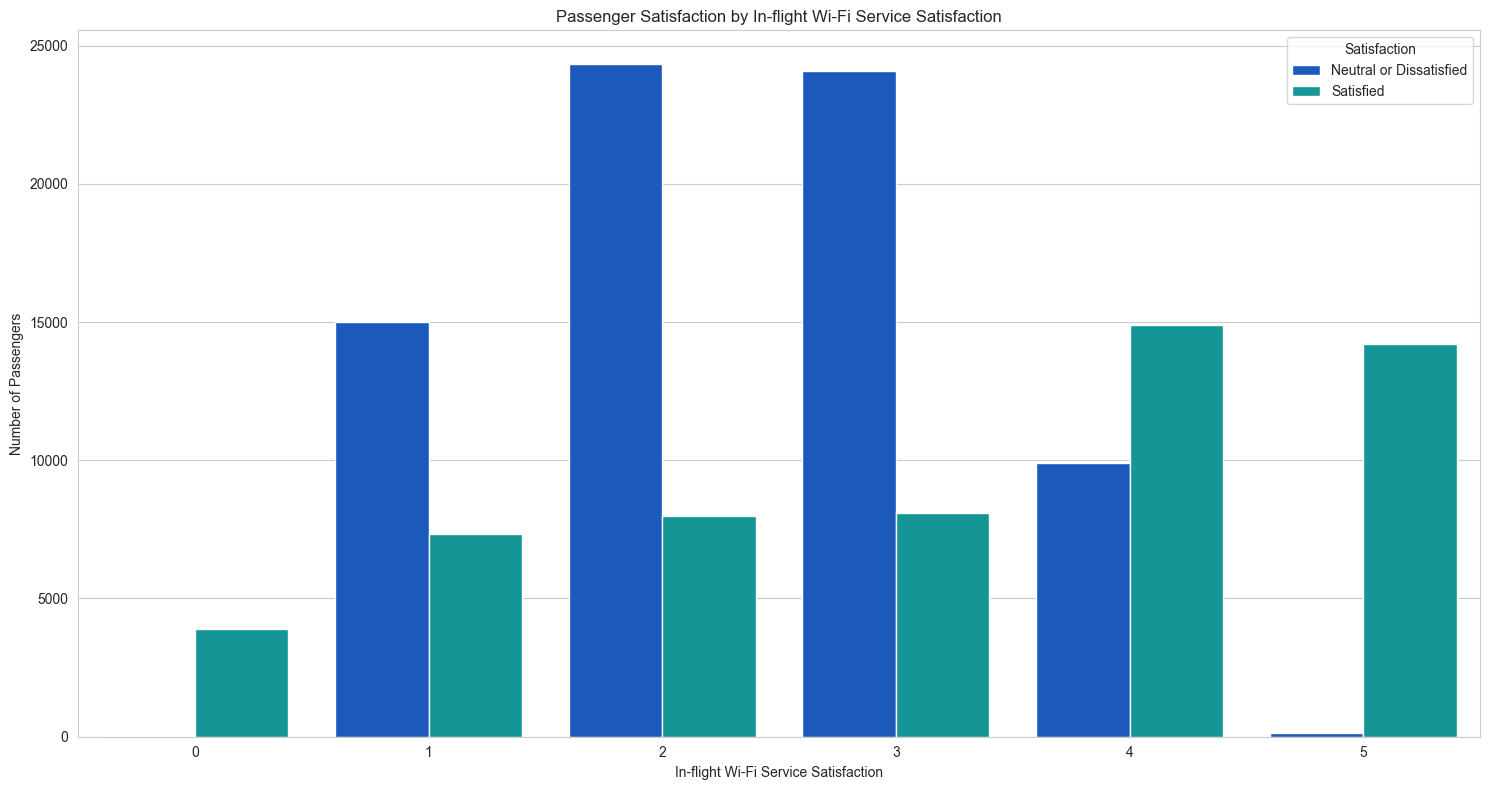

In [16]:
# Plotting the relationship between overall passenger satisfaction and in-flight Wi-Fi service

plt.figure(figsize = (15, 8))
sns.countplot(x = 'In-flight Wifi Service', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Passenger Satisfaction by In-flight Wi-Fi Service Satisfaction')
plt.xlabel('In-flight Wi-Fi Service Satisfaction')
plt.ylabel('Number of Passengers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()



Observation : The bar chart shows the relationship between passenger satisfaction and in-flight Wi-Fi service satisfaction. We can observe that :

Passengers who rated the Wi-Fi service as 4 or 5 are predominantly satisfied.
Passengers who rated the Wi-Fi service as 1, 2, or even 3 are predominantly dissatisfied.

How does passenger satisfaction vary depending on the type of travel (business or personal) ?

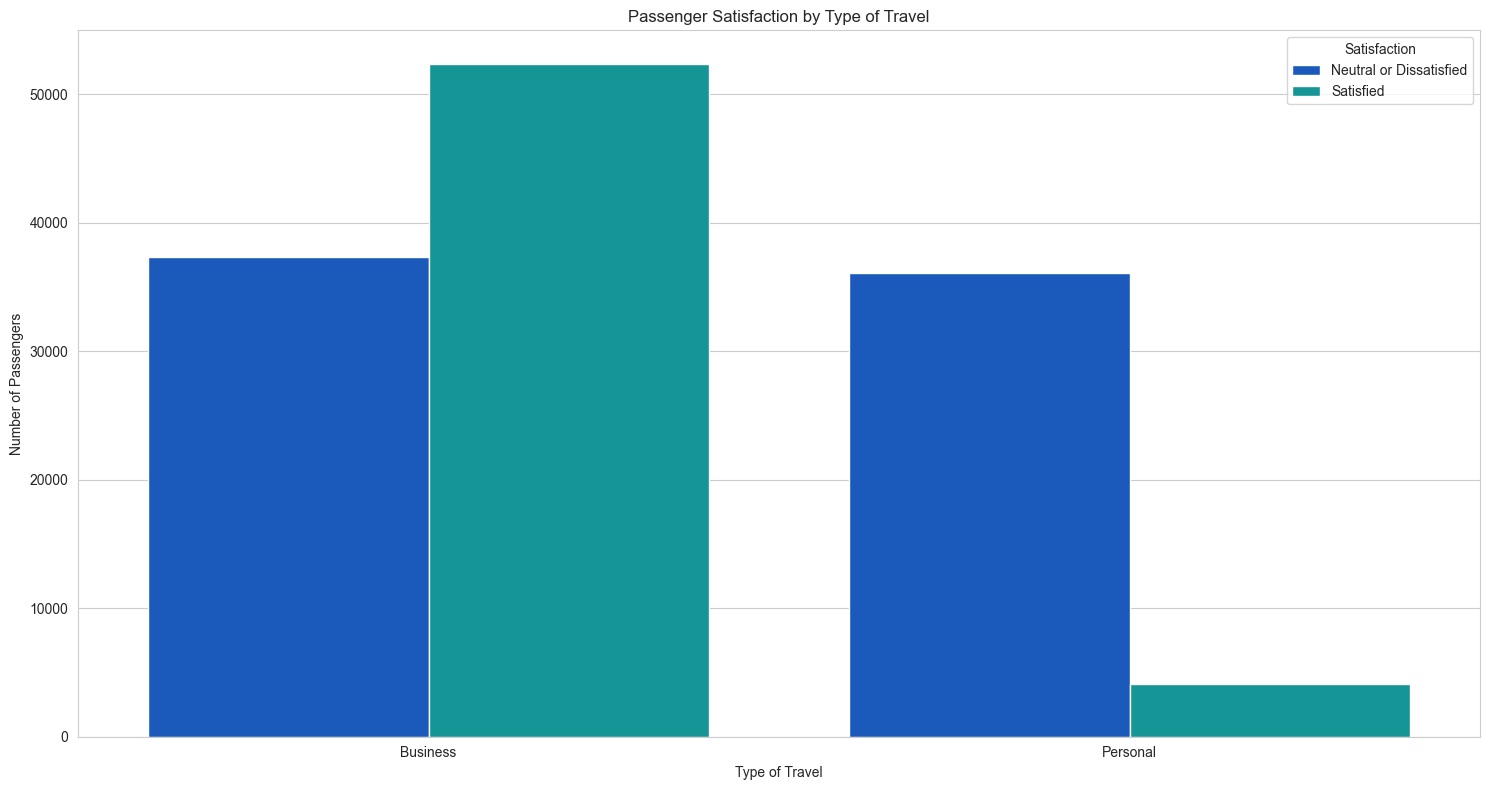

In [17]:
# Plotting the relationship between overall satisfaction and type of travel

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Type of Travel', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Passenger Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Number of Passengers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : The bar chart shows the distribution of passenger satisfaction based on the type of travel. We can observe that :

Among business travelers, satisfaction is relatively balanced with a majority being satisfied.
Among personal travelers, the majority are dissatisfied or neutral.

How does passenger satisfaction vary depending on the satisfaction with the onboard food and drink service ?

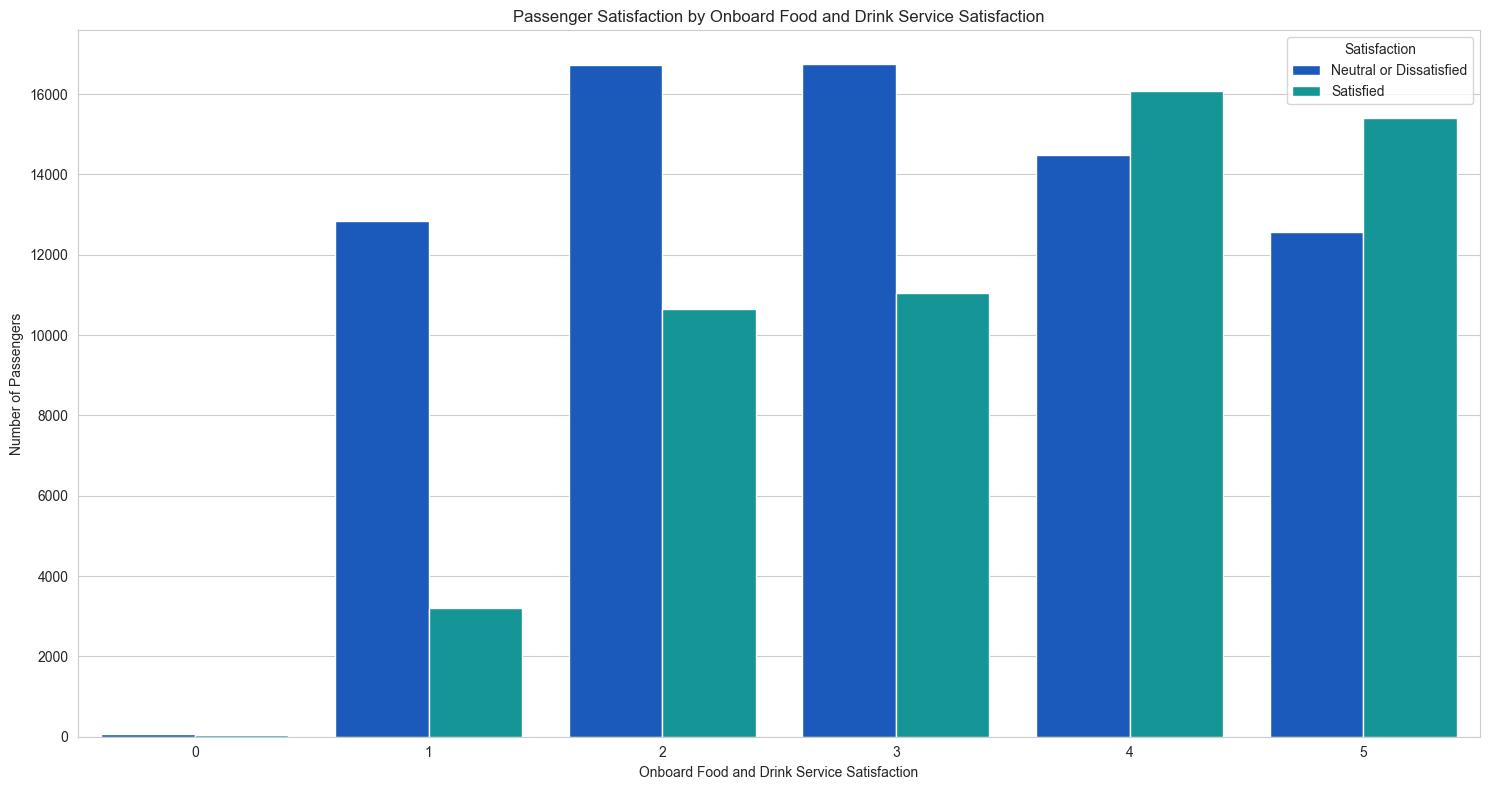

In [18]:
# Plotting the relationship between overall satisfaction and satisfaction with the onboard food and drink service

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Food and Drink', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Passenger Satisfaction by Onboard Food and Drink Service Satisfaction')
plt.xlabel('Onboard Food and Drink Service Satisfaction')
plt.ylabel('Number of Passengers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : The bar chart shows the distribution of passenger satisfaction based on their satisfaction with the onboard food and drink service. We can observe that :

Passengers who rated the food and drink service as 4 or 5 are predominantly satisfied.
Passengers who rated the food and drink service as 1, 2, or even 3 are predominantly dissatisfied or neutral.

### 6. Multivariate Analysis

How does passenger satisfaction vary depending on travel class and age ?

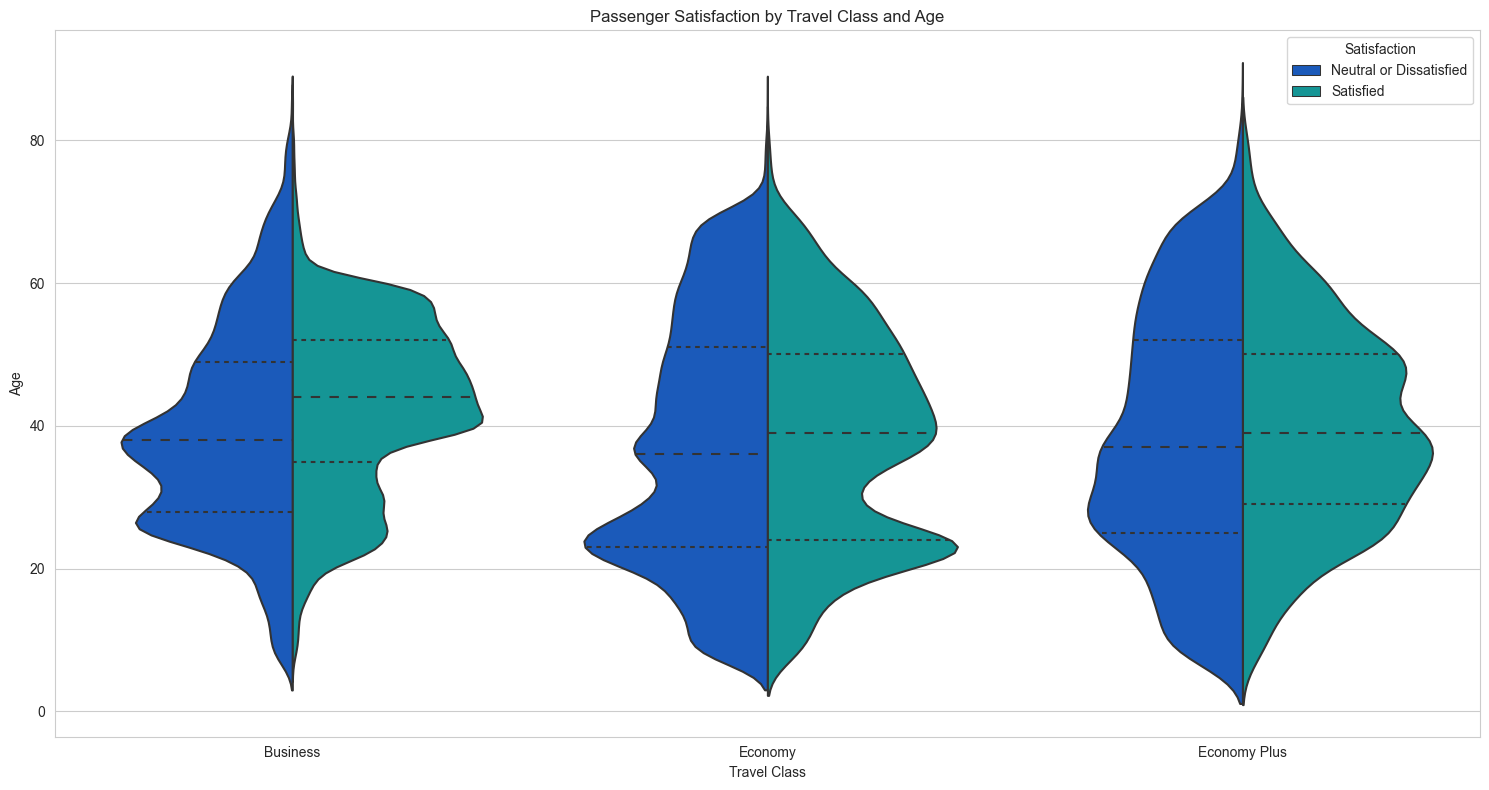

In [19]:
# Plotting the relationship between travel class, overall satisfaction, and age of travelers

plt.figure(figsize = (15, 8))
sns.violinplot(x = 'Class', y = 'Age', hue = 'Satisfaction', data = df, palette = 'winter', inner = 'quartile', split = True)
plt.title('Passenger Satisfaction by Travel Class and Age')
plt.xlabel('Travel Class')
plt.ylabel('Age')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : The diagram shows the distribution of passengers' ages based on travel class and overall satisfaction. We can observe that :

In business class, the age distribution of satisfied passengers is above forty, whereas it is under 40 years for the dissatisfied ones.
In economy and economy plus classes, the age distribution is relatively low regardless of whether the passengers are satisfied or dissatisfied.

How does passenger satisfaction vary depending on the type of travel and satisfaction with the onboard food and drink service ?

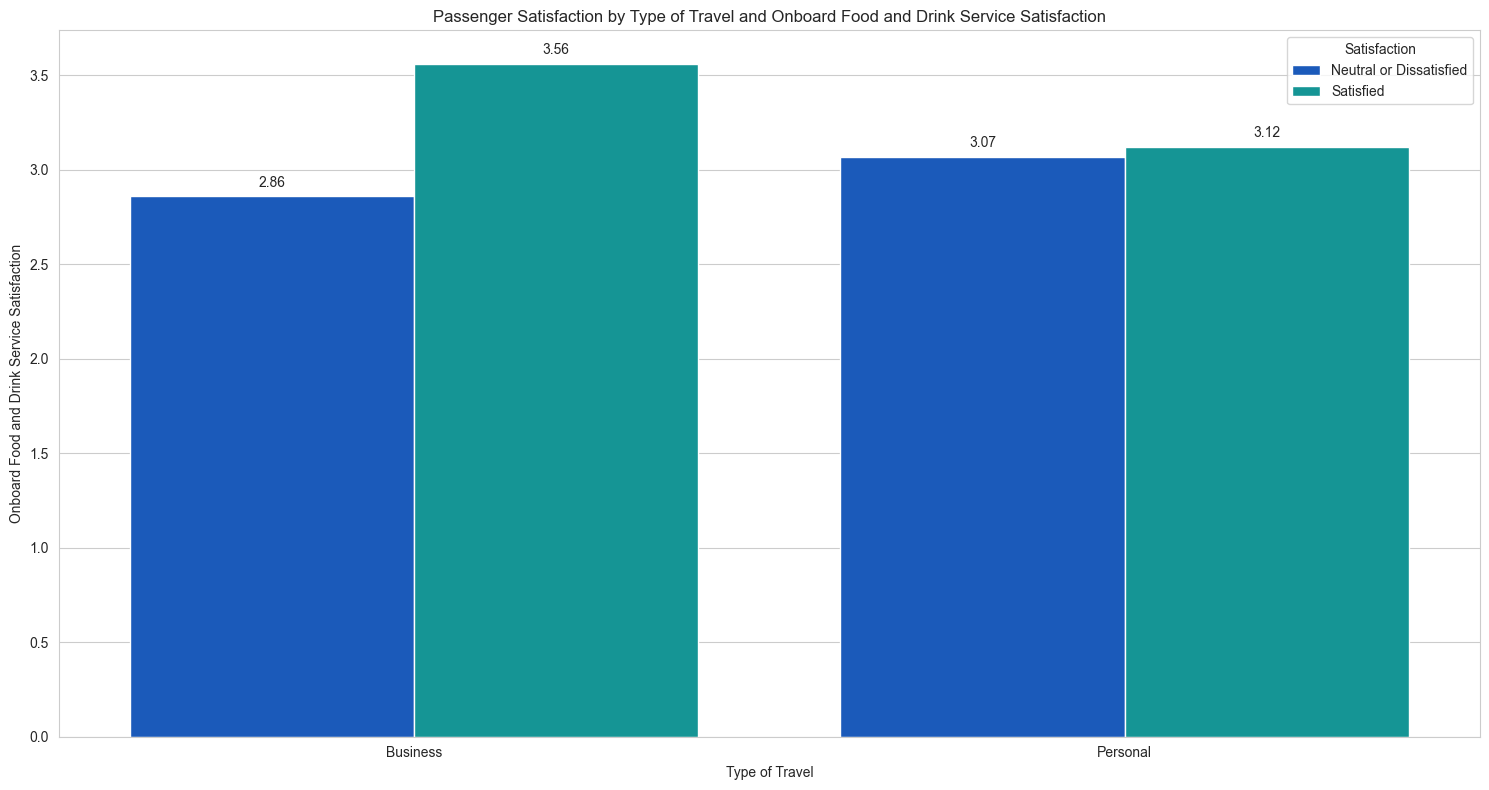

In [20]:
# Plot the relationship between overall traveler satisfaction, type of travel, and rating of the onboard food and drink service

df_fooddrink = df[df['Food and Drink'] != 0]

plt.figure(figsize = (15, 8))
barplot1 = sns.barplot(x = 'Type of Travel', y = 'Food and Drink', hue = 'Satisfaction', data = df_fooddrink, palette = 'winter', errorbar = None)
plt.title('Passenger Satisfaction by Type of Travel and Onboard Food and Drink Service Satisfaction')
plt.xlabel('Type of Travel')
plt.ylabel('Onboard Food and Drink Service Satisfaction')
plt.legend(title = 'Satisfaction')
plt.tight_layout()

for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')

plt.show()

Observation : The bar chart demonstrates the relationship between passenger satisfaction, the type of travel (business or personal), and satisfaction with the onboard food and drink service. We can observe that :

Satisfied business travelers tend to rate the onboard food and drink service more positively.
Satisfied personal travelers, as well as dissatisfied or neutral ones, tend to rate the onboard food and drink service similarly.

How does passenger satisfaction vary depending on the travel class and satisfaction with the in-flight Wi-Fi service ?

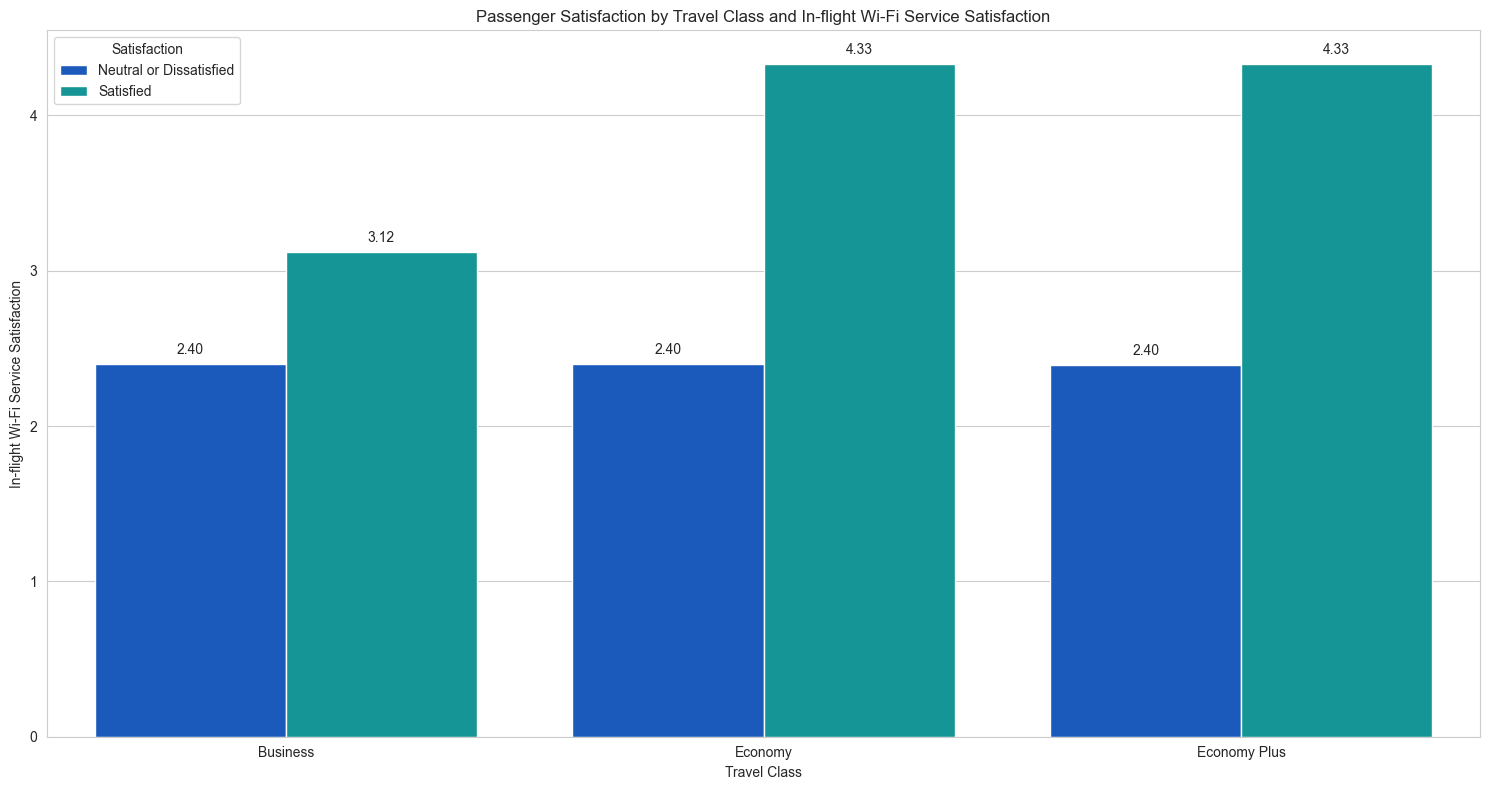

In [21]:
# Plot the relationship between overall satisfaction, travel class, and in-flight Wi-Fi service

df_wifi = df[df['In-flight Wifi Service'] != 0]

plt.figure(figsize=(15, 8))
barplot2 = sns.barplot(x = 'Class', y = 'In-flight Wifi Service', hue = 'Satisfaction', data = df_wifi, palette = 'winter', errorbar = None)
plt.title('Passenger Satisfaction by Travel Class and In-flight Wi-Fi Service Satisfaction')
plt.xlabel('Travel Class')
plt.ylabel('In-flight Wi-Fi Service Satisfaction')
plt.legend(title = 'Satisfaction')
plt.tight_layout()

for p in barplot2.patches:
    barplot2.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')

plt.show()


Observation : The bar chart shows the relationship between passenger satisfaction, travel class, and satisfaction with the in-flight Wi-Fi service. We can observe that :

Generally, regardless of the travel class, travelers who tend to be satisfied with the Wi-Fi service are also satisfied overall.

How does passenger satisfaction vary depending on the travel class and satisfaction with onboard seating ?

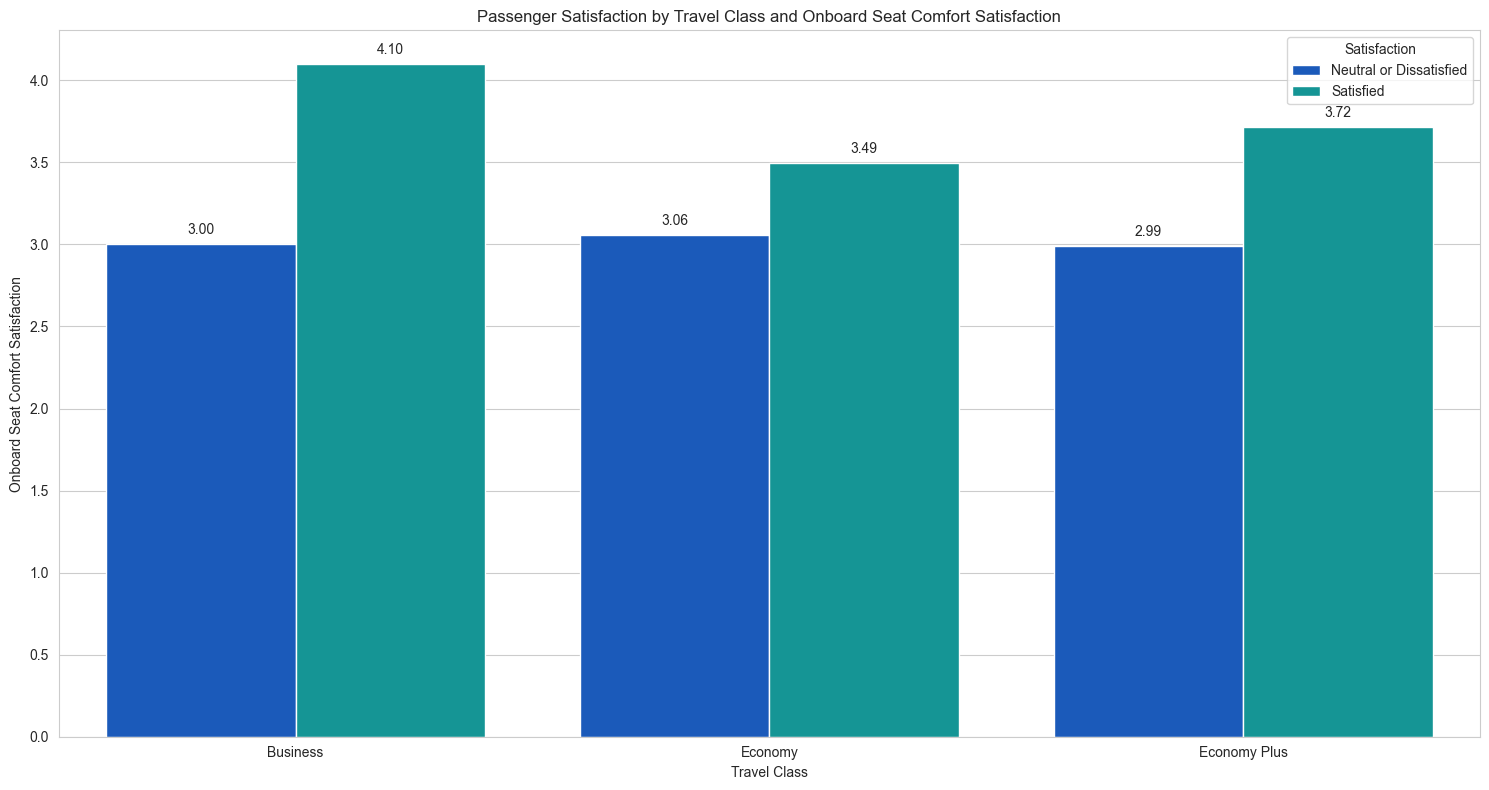

In [22]:
# Plot the relationship between overall satisfaction, travel class, and onboard seat comfort

df_seat = df[df['Seat Comfort'] != 0]

plt.figure(figsize = (15, 8))
barplot3 = sns.barplot(x = 'Class', y = 'Seat Comfort', hue = 'Satisfaction', data = df_seat, palette = 'winter', errorbar = None)
plt.title('Passenger Satisfaction by Travel Class and Onboard Seat Comfort Satisfaction')
plt.xlabel('Travel Class')
plt.ylabel('Onboard Seat Comfort Satisfaction')
plt.legend(title = 'Satisfaction')
plt.tight_layout()

for p in barplot3.patches:
    barplot3.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')

plt.show()

Observation : The bar chart illustrates the relationship between passenger satisfaction, travel class, and satisfaction with the seats onboard. We can note that :

Generally, irrespective of the travel class, travelers who tend to be satisfied with the onboard seats are also satisfied overall.

Which variable has the strongest correlation with the overall satisfaction rating ?

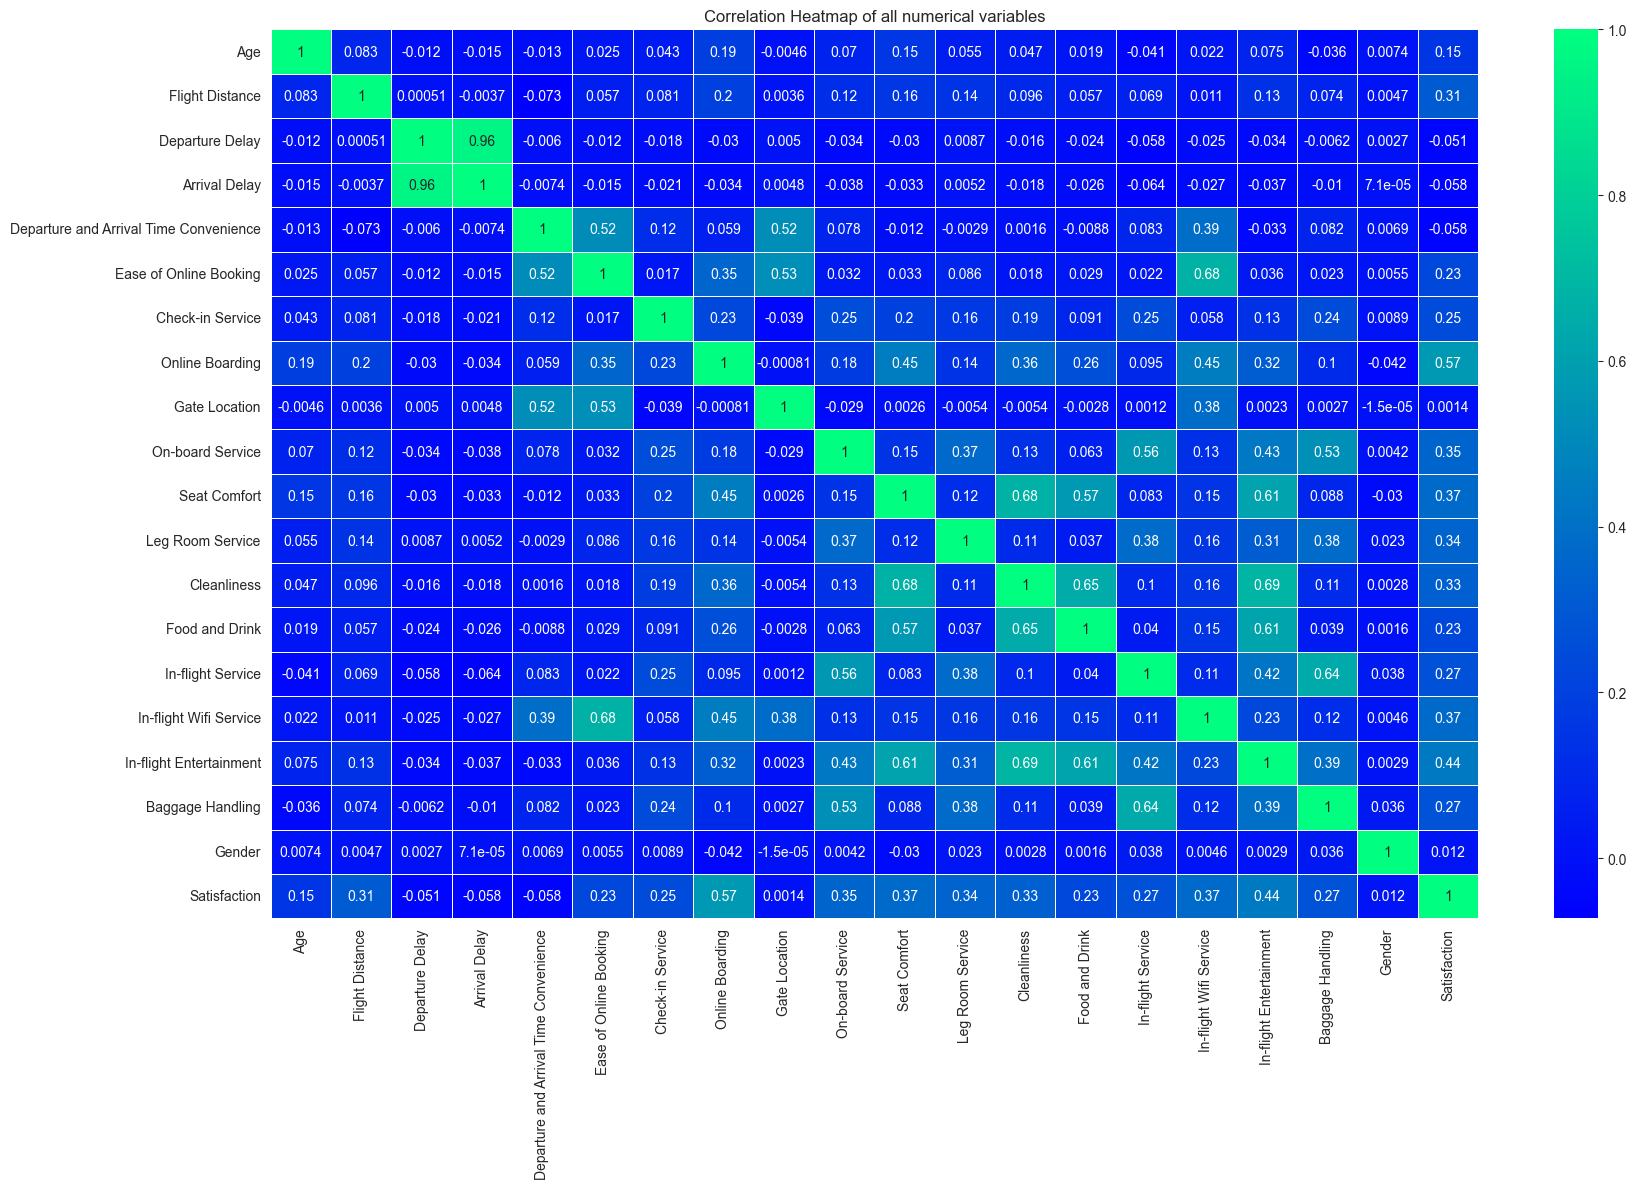

In [23]:
# Remove the 0 in each rating column as it's not an actual rating but an indication that the rating cannot be applied to that particular flight

df_zero = df[~df[['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
                  'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Wifi Service',
                  'Baggage Handling']].isin([0]).any(axis = 1)]

# Replace the values of categorical variables.

satisfaction_num = df_zero['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})
gender_num = df_zero['Gender'].map({'Male': 1, 'Female': 0})

# Creation of a new DataFrame with all numerical variables + Satisfaction

df_num = df_zero[['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
                  'Departure and Arrival Time Convenience', 'Ease of Online Booking',
                  'Check-in Service', 'Online Boarding', 'Gate Location',
                  'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
                  'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
                  'In-flight Entertainment', 'Baggage Handling']].copy()
df_num['Gender'] = gender_num
df_num['Satisfaction'] = satisfaction_num

# Calculation of the correlation matrix

correlation = df_num.corr()

# Plotting the heatmap of the correlation

plt.figure(figsize = (18, 12))
sns.heatmap(correlation, annot = True, cmap = 'winter', linewidths = .5)
plt.title('Correlation Heatmap of all numerical variables')
plt.tight_layout()
plt.show()

Observation : Variables with a notable positive correlation with overall satisfaction include "Online Boarding" (0.5), "In-flight Entertainment" (0.4), "Seat Comfort" (0.35), "On-board Service" (0.32), and "In-flight Wifi Service" (0.28).
"Cleanliness" and "Leg Room Service" also have a positive correlation with satisfaction.
Departure and arrival delays, as well as "Gate Location," have a weak correlation with satisfaction, indicating a lesser or no impact.

### 7. Machine Learning

Step 1 : Data Preparation

Feature Selection : We will include most of the available variables, excluding those that are redundant or do not provide useful information for prediction.

Transformation of Categorical Variables : We will transform categorical variables using One-Hot Encoding to make them usable by the model.

Data Splitting : We will divide the data into training and testing sets to evaluate the model's performance on unseen data.

In [24]:
# Variables to exclude

excluded_variables = ['ID']

# Selection of variables and target
X = df_zero.drop(columns = excluded_variables + ['Satisfaction'])
y = df_zero['Satisfaction']

# One-hot encoding for categorical variables

X_encoded = pd.get_dummies(X, drop_first = True)

# Splitting the dataset into two parts: train and test (80/20)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42, stratify = y)


Step 2 : Model Building

For building the model, we will use a Random Forest algorithm. It is commonly used for classification tasks and also provides information about the importance of features.

In [25]:
# Creation of a Random Forest Classifier

random_forest_model = RandomForestClassifier(random_state = 42, n_jobs = -1)

# Training the model on the training data

random_forest_model.fit(X_train, y_train)

# Predicting satisfaction on the test data

y_pred = random_forest_model.predict(X_test)

# Calculating the accuracy of the model

accuracy_rf = accuracy_score(y_test, y_pred)

print("Accuracy of the Random Forest model:", accuracy_rf)

Accuracy of the Random Forest model: 0.9623233252488083


In [26]:
# Scaling the training and test data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Logistic Regression model

logistic_model = LogisticRegression(random_state = 42, max_iter = 1000, n_jobs = -1)

# Training the model on the training data

logistic_model.fit(X_train_scaled, y_train)

# Predicting satisfaction on the test data

y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculating the accuracy of the model

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Accuracy of the Logistic Regression model:", accuracy_logistic)

Accuracy of the Logistic Regression model: 0.8974241030358786


Observation : The overall accuracy of the logistic regression model is 89.74%, which is slightly lower than that of the random forest model (96.23%). This indicates that while logistic regression is effective, the random forest is more suited to these specific data.

In summary, although logistic regression provides good results, the random forest appears to be a more appropriate model choice for this task, as we observed earlier.

Step 3 : Feature Importance Analysis

In this step, we will analyze the importance of different features in predicting satisfaction. This will help us understand which factors have the greatest impact on customer satisfaction.

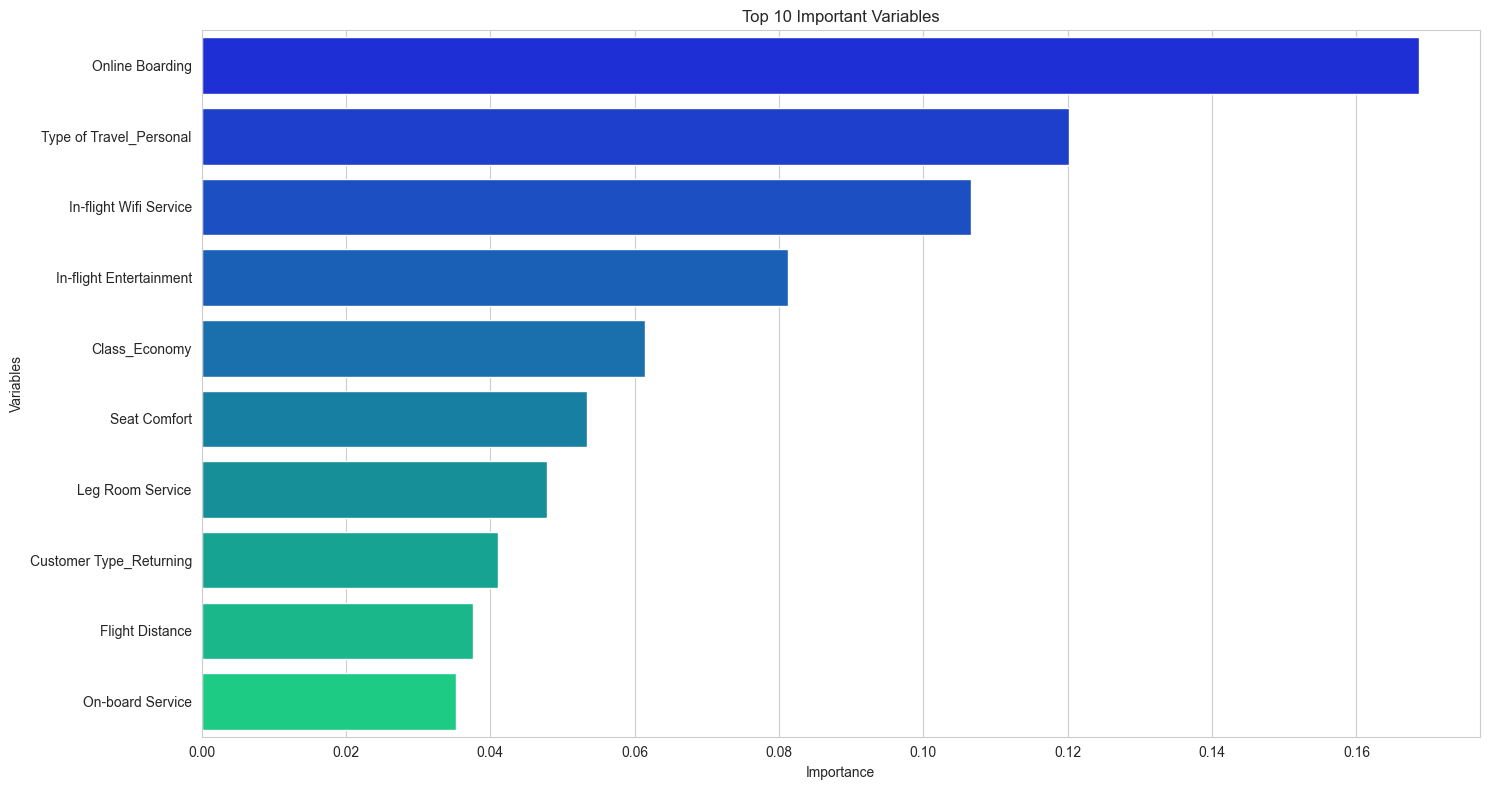

In [27]:
# Retrieving feature importances from the trained random forest model

feature_importances = random_forest_model.feature_importances_

# Creating a DataFrame that includes the names of the variables and their importance

feature_importances_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Keeping the top 10 most impactful features in descending order

feature_importances_desc = feature_importances_df.sort_values(by = 'Importance', ascending = False).head(10)

# Plotting the top 10 most impactful features

plt.figure(figsize = (15, 8))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importances_desc, palette = 'winter')
plt.title('Top 10 Important Variables')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### 8. Dashboard (Plotly Dash)

In [28]:
# Definition of satisfaction colors

colors = {
    "Neutral or Dissatisfied": "red",
    "Satisfied": "blue"
}

# Histogram of the age distribution

hist_age = px.histogram(df, x = 'Age', title = 'Passenger Age Distribution')

# Bar chart for Class vs Satisfaction

class_satisfaction_data = df.groupby(['Class', 'Satisfaction']).size().reset_index(name = 'Count')
fig1 = go.Figure()
for sat, color in colors.items():
    subset = class_satisfaction_data[class_satisfaction_data['Satisfaction'] == sat]
    fig1.add_trace(go.Bar(x = subset['Class'], y = subset['Count'], name = sat, marker_color = color))
fig1.update_layout(title = 'Class vs Satisfaction')

# Bar chart for Type of Travel vs Satisfaction

travel_satisfaction_data = df.groupby(['Type of Travel', 'Satisfaction']).size().reset_index(name = 'Count')
fig2 = go.Figure()
for sat, color in colors.items():
    subset = travel_satisfaction_data[travel_satisfaction_data['Satisfaction'] == sat]
    fig2.add_trace(go.Bar(x = subset['Type of Travel'], y = subset['Count'], name = sat, marker_color = color))
fig2.update_layout(title = 'Type of Travel vs Satisfaction')

# Initializing the Dash application

app = dash.Dash(__name__)

# Set the dashboard layout

app.layout = html.Div([
    dcc.Graph(id = 'age_histogram', figure = hist_age),
    dcc.Graph(id = 'class_satisfaction', figure = fig1),
    dcc.Graph(id = 'travel_satisfaction', figure = fig2)
])

# Running the application

if __name__ == '__main__':
    app.run_server(debug = True)

### 9. Insights and Recommendations

**Key Findings :**

Passenger satisfaction at Maven Airlines significantly varies based on travel class, type of travel, and onboard services like Wi-Fi and catering. Business class passengers are generally more satisfied. Notable correlations exist between overall satisfaction and factors such as online boarding, in-flight entertainment, and seat comfort. Targeted efforts to improve these key areas, especially in economy class, could help increase passenger satisfaction.


**Recommendations :** Based on the results of our analysis, we can make the following recommendations :

**Improve Key Services :** Focus on enhancing services that are strongly correlated with satisfaction, such as online boarding, in-flight entertainment, and seat comfort.

**Target the Needs of Economy Class Passengers :** Offer specific improvements for the economy class, where dissatisfaction is higher.

**Optimize Wi-Fi and Catering Services :** Assess and improve these services, as they have a direct impact on overall satisfaction.

**Personalize Offers According to Travel Type :** Differentiate offerings and services between business and personal travelers to better meet their specific needs.

**Continuously Monitor Passenger Feedback :** Establish a regular system for tracking passenger feedback to quickly identify areas for improvement.

### 10. Conclusion

The analysis of Maven Airlines' passenger satisfaction has revealed key areas of opportunity and improvement. Travel class, travel type, and specific services like Wi-Fi and catering play a vital role in overall satisfaction. The insights gained allow for targeted improvements, with a particular focus on the economy class. In the near future, further analyses could be conducted, such as exploring specific passenger segments or studying the impact of delays on satisfaction. The implementation of recommendations and the use of a machine learning model support Maven Airlines' goal of quickly getting back on track to success while paving the way for more in-depth investigations.